In [53]:
pip install plotly==5.3.1

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install dataprep

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


In [57]:
import os

In [58]:
os.getcwd()

'C:\\Users\\Usuario\\Documents\\UTN\\4- CUARTO AÑO\\Ciencia de datos\\ProyectoFinal---CienciasDeDatos'

In [59]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
data= pd.read_excel('C:\\Users\\Usuario\\Documents\\UTN\\4- CUARTO AÑO\\Ciencia de datos\\ProyectoFinal---CienciasDeDatos\\marketing_campaign.xlsx')
df = pd.DataFrame(data)
df


ID  Year_Birth   Education Marital_Status     Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.000        0   
1      2174        1954  Graduation         Single  46344.000        1   
2      4141        1965  Graduation       Together  71613.000        0   
3      6182        1984  Graduation       Together  26646.000        1   
4      5324        1981         PhD        Married  58293.000        1   
5      7446        1967      Master       Together  62513.000        0   
6       965        1971  Graduation       Divorced  55635.000        0   
7      6177        1985         PhD        Married  33454.000        1   
8      4855        1974         PhD       Together  30351.000        1   
9      5899        1950         PhD       Together   5648.000        1   
10     1994        1983  Graduation        Married        NaN        1   
11      387        1976       Basic        Married   7500.000        0   
12     2125        1959  Graduation       Divorced  63033.000        0   
13     8180        1952      Master       Divorced  59354.000        1   
14     2569        1987  Graduation        Married  17323.000        0   
15     2114        1946         PhD         Single  82800.000        0   
16     9736        1980  Graduation        Married  41850.000        1   
17     4939        1946  Graduation       Together  37760.000        0   
18     6565        1949      Master        Married  76995.000        0   
19     2278        1985    2n Cycle         Single  33812.000        1   
20     9360        1982  Graduation        Married  37040.000        0   
21     5376        1979  Graduation        Married   2447.000        1   
22     1993        1949         PhD        Married  58607.000        0   
23     4047        1954         PhD        Married  65324.000        0   
24     1409        1951  Graduation       Together  40689.000        0   
25     7892        1969  Graduation         Single  18589.000        0   
26     2404        1976  Graduation        Married  53359.000        1   
27     5255        1986  Graduation         Single        NaN        1   
28     9422        1989  Graduation        Married  38360.000        1   
29     1966        1965         PhD        Married  84618.000        0   
30     6864        1989      Master       Divorced  10979.000        0   
31     3033        1963      Master       Together  38620.000        0   
32     5710        1970  Graduation       Together  40548.000        0   
33     7373        1952         PhD       Divorced  46610.000        0   
34     8755        1946      Master        Married  68657.000        0   
35    10738        1951      Master         Single  49389.000        1   
36     4339        1970         PhD        Married  67353.000        0   
37    10755        1976    2n Cycle        Married  23718.000        1   
38     8595        1973  Graduation          Widow  42429.000        0   
39     2968        1943         PhD       Divorced  48948.000        0   
40     8601        1980  Graduation        Married  80011.000        0   
41      503        1985      Master        Married  20559.000        1   
42     8430        1957  Graduation       Together  21994.000        0   
43     7281        1959         PhD         Single        NaN        0   
44     2139        1975      Master        Married   7500.000        1   
45     1371        1976  Graduation         Single  79941.000        0   
46     9909        1996    2n Cycle        Married   7500.000        0   
47     7286        1968  Graduation       Together  41728.000        1   
48     7244        1951  Graduation         Single        NaN        2   
49     6566        1954         PhD        Married  72550.000        1   
50     8614        1957  Graduation          Widow  65486.000        0   
51     4114        1964      Master        Married  79143.000        0   
52     1331        1977  Graduation         Single  35790.000        1   
53     2225  

  0%|          | 0/1533 [00:00<?, ?it/s]


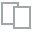
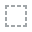
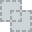
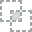
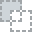
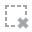
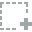
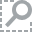
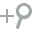
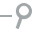
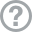
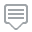
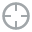
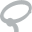
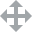
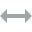
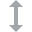
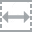
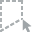
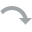
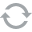
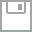
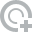
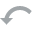
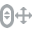
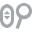
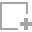
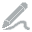
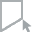
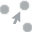
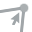
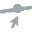

In [60]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
plot(data)

In [61]:
#ESTADISTICA DESCRIPTIVA
from statistics import mean
from math import sqrt

def funcion_cuantitativos(valor): 
    media = df[valor].mean()
    mediana = df[valor].median()
    moda = df[valor].mode()
    p90 = df[valor].quantile(0.3)
    rango = df[valor].max() - df[valor].min()
    iqr = df[valor].quantile(0.75) - df[valor].quantile(0.25)
    varianza=df[valor].var()
    desvio= sqrt(varianza)
    cv= (desvio/media)*100

    print("""
        Media: %.2f
        Mediana: %.2f
        Moda: %.2f
        Quartil 3: %.2f
        Rango: %.2f 
        Rango Intercuartil: %.2f
        Varianza: %.2f
        Desvio Estándar: %.2f
        Coeficiente de variación: %.2f
    """ % (media,mediana,moda,p90,rango,iqr, varianza, desvio, cv))
    
#Año de nacimiento
print("AÑO DE NACIMIENTO")
funcion_cuantitativos('Year_Birth')


#Ingresos
print("Ingresos")
funcion_cuantitativos('Income')

#Kidhome
print("Número de niños en el hogar")
funcion_cuantitativos('Kidhome')

#Teenhome
print("Número de adolescentes en el hogar")
funcion_cuantitativos('Teenhome')

#Recency
print("Número de días desde la última compra del cliente")
funcion_cuantitativos('Recency')

#MntWines
print("Cantidad gastada en vino en los últimos 2 años")
funcion_cuantitativos('MntWines')

#MntFruits
print("Cantidad gastada en frutas en los últimos 2 años")
funcion_cuantitativos('MntFruits')

#MntMeatProducts
print("Cantidad gastada en carnes en los últimos 2 años")
funcion_cuantitativos('MntMeatProducts')

#MntFishProducts
print("Cantidad gastada en pescados en los últimos 2 años")
funcion_cuantitativos('MntFishProducts')

#MntSweetProducts
print("Cantidad gastada en dulces en los últimos 2 años")
funcion_cuantitativos('MntSweetProducts')

#MntGoldProds
print("Cantidad gastada en oro en los últimos 2 años")
funcion_cuantitativos('MntGoldProds')

#NumDealsPurchases
print("Número de compras realizadas con descuento")
funcion_cuantitativos('NumDealsPurchases')

#NumCatalogPurchases
print("Número de compras realizadas mediante un catálogo")
funcion_cuantitativos('NumCatalogPurchases')

#NumStorePurchases 
print("Número de compras realizadas directamente en las tiendas")
funcion_cuantitativos('NumStorePurchases')

#NumWebVisitsMonth
print("Número de visitas al sitio web de la empresa en el último mes")
funcion_cuantitativos('NumWebVisitsMonth')

AÑO DE NACIMIENTO

        Media: 1968.81
        Mediana: 1970.00
        Moda: 1976.00
        Quartil 3: 1962.00
        Rango: 103.00 
        Rango Intercuartil: 18.00
        Varianza: 143.62
        Desvio Estándar: 11.98
        Coeficiente de variación: 0.61
    
Ingresos

        Media: 52247.25
        Mediana: 51381.50
        Moda: 7500.00
        Quartil 3: 38198.50
        Rango: 664936.00 
        Rango Intercuartil: 33219.00
        Varianza: 633683788.58
        Desvio Estándar: 25173.08
        Coeficiente de variación: 48.18
    
Número de niños en el hogar

        Media: 0.44
        Mediana: 0.00
        Moda: 0.00
        Quartil 3: 0.00
        Rango: 2.00 
        Rango Intercuartil: 1.00
        Varianza: 0.29
        Desvio Estándar: 0.54
        Coeficiente de variación: 121.21
    
Número de adolescentes en el hogar

        Media: 0.51
        Mediana: 0.00
        Moda: 0.00
        Quartil 3: 0.00
        Rango: 2.00 
        Rango Intercuartil: 1.00
  

In [62]:
#Spending variable creation
data['Age']=2014-data['Year_Birth']

data['Spending']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
#Seniority variable creation
last_date = date(2014,10, 4)
data['Seniority']=pd.to_datetime(data['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
data['Seniority'] = pd.to_numeric(data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30
data=data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
data['Marital_Status']=data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

data['Children']=data['Kidhome']+data['Teenhome']
data['Has_child'] = np.where(data.Children> 0, 'Has child', 'No child')
data['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})


data=data[['Age','Education','Marital_Status','Income','Spending','Seniority','Has_child','Children','Wines','Fruits','Meat','Fish','Sweets','Gold']]
data.head()

Age     Education Marital_Status    Income  Spending  Seniority  Has_child  \
0   57  Postgraduate          Alone 58138.000      1617     25.333   No child   
1   60  Postgraduate          Alone 46344.000        27      7.000  Has child   
2   49  Postgraduate      In couple 71613.000       776     13.633   No child   
3   30  Postgraduate      In couple 26646.000        53      7.867  Has child   
4   33  Postgraduate      In couple 58293.000       422      8.600  Has child   

     Children  Wines  Fruits  Meat  Fish  Sweets  Gold  
0    No child    635      88   546   172      88    88  
1  2 children     11       1     6     2       1     6  
2    No child    426      49   127   111      21    42  
3     1 child     11       4    20    10       3     5  
4     1 child    173      43   118    46      27    15

In [63]:
#Eliminamos valores atipicos 
data=data.dropna(subset=['Income'])
data=data[data['Income']<600000]

In [64]:
#Agrupamos en:
#Estrellas:  Clientes antiguos con altos ingresos y alta naturaleza de gasto.
#Neet Attention:  Nuevos clientes con ingresos por debajo del promedio y naturaleza de bajo gasto. 
#Alto potencial:  nuevos clientes con altos ingresos y alta naturaleza de gasto.
#Cubo con fugas:  Clientes antiguos con ingresos por debajo del promedio y una naturaleza de bajo gasto.

scaler=StandardScaler()
dataset_temp=data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')

gmm=GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)

pd.options.display.float_format = "{:.0f}".format
summary=data[['Income','Spending','Seniority','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary.head()

Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             584           641             528    462
       mean            34757         37705           69542  73438
       std             12075         12397           12006  13753
       min              2447          1730           44802  49090
       25%             26489         28839           60880  65298

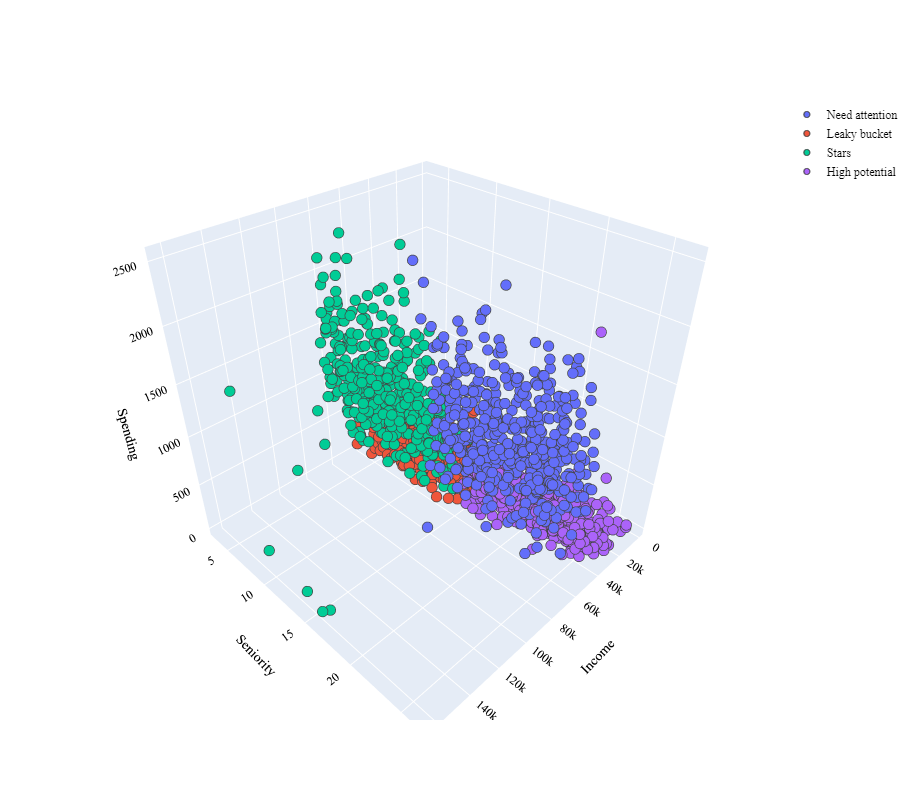

In [65]:
PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data.Cluster == C]['Income'],
                                y = data[data.Cluster == C]['Seniority'],
                                z = data[data.Cluster == C]['Spending'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [66]:
#Create Age segment
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
data['Age_group'] = pd.cut(data['Age'], bins=cut_bins, labels=cut_labels_Age)
#Create Income segment
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
data['Income_group'] = pd.qcut(data['Income'], q=4, labels=cut_labels_Income)
#Create Seniority segment
cut_labels_Seniority = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
data['Seniority_group'] = pd.qcut(data['Seniority'], q=4, labels=cut_labels_Seniority)
data=data.drop(columns=['Age','Income','Seniority'])

In [67]:
cut_labels = ['Low consumer', 'Frequent consumer', 'Biggest consumer']
data['Wines_segment'] = pd.qcut(data['Wines'][data['Wines']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Fruits_segment'] = pd.qcut(data['Fruits'][data['Fruits']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Meat_segment'] = pd.qcut(data['Meat'][data['Meat']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Fish_segment'] = pd.qcut(data['Fish'][data['Fish']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Sweets_segment'] = pd.qcut(data['Sweets'][data['Sweets']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Gold_segment'] = pd.qcut(data['Gold'][data['Gold']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data.replace(np.nan, "Non consumer",inplace=True)
data.drop(columns=['Spending','Wines','Fruits','Meat','Fish','Sweets','Gold'],inplace=True)
data = data.astype(object)

In [68]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format
association=data.copy() 
df = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

In [69]:
product='Wines'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

antecedents  \
4858                               (Cluster_Need attention, Income_group_High income)   
4871                          (Cluster_Need attention, Seniority_group_Old customers)   
9431  (Meat_segment_Biggest consumer, Cluster_Need attention, Education_Postgraduate)   
1430                                 (Cluster_Need attention, Education_Postgraduate)   
6142       (Marital_Status_In couple, Cluster_Need attention, Education_Postgraduate)   

                           consequents  antecedent support  \
4858  (Wines_segment_Biggest consumer)               0.121   
4871  (Wines_segment_Biggest consumer)               0.123   
9431  (Wines_segment_Biggest consumer)               0.122   
1430  (Wines_segment_Biggest consumer)               0.219   
6142  (Wines_segment_Biggest consumer)               0.139   

      consequent support  support  confidence  lift  leverage  conviction  
4858               0.249    0.084       0.697 2.800     0.054       2.476  
4871               0.249    0.085       0.691 2.779     0.054       2.433  
9431               0.249    0.081       0.664 2.670     0.051       2.237  
1430               0.249    0.142       0.649 2.608     0.087       2.139  
6142               0.249    0.090       0.648 2.606     0.055       2.135

In [70]:
product='Fruits'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

antecedents  \
5333                         (Sweets_segment_Biggest consumer, Fish_segment_Biggest consumer)   
10174  (Meat_segment_Biggest consumer, Education_Postgraduate, Fish_segment_Biggest consumer)   
5321                           (Meat_segment_Biggest consumer, Fish_segment_Biggest consumer)   
5326                         (Meat_segment_Biggest consumer, Sweets_segment_Biggest consumer)   
5094                              (Sweets_segment_Biggest consumer, Income_group_High income)   

                             consequents  antecedent support  \
5333   (Fruits_segment_Biggest consumer)               0.126   
10174  (Fruits_segment_Biggest consumer)               0.132   
5321   (Fruits_segment_Biggest consumer)               0.146   
5326   (Fruits_segment_Biggest consumer)               0.137   
5094   (Fruits_segment_Biggest consumer)               0.129   

       consequent support  support  confidence  lift  leverage  conviction  
5333                0.203    0.084       0.664 3.270     0.058       2.374  
10174               0.203    0.085       0.645 3.175     0.058       2.245  
5321                0.203    0.093       0.639 3.145     0.064       2.207  
5326                0.203    0.087       0.634 3.119     0.059       2.175  
5094                0.203    0.081       0.629 3.098     0.055       2.150

In [71]:
product='Meat'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

antecedents  \
13611                                             (Has_child_No child, Income_group_High income, Fish_segment_Biggest consumer)   
13919                                              (Income_group_High income, Children_No child, Fish_segment_Biggest consumer)   
20710                          (Has_child_No child, Income_group_High income, Children_No child, Fish_segment_Biggest consumer)   
22413  (Income_group_High income, Education_Postgraduate, Children_No child, Fish_segment_Biggest consumer, Has_child_No child)   
18728                      (Income_group_High income, Education_Postgraduate, Children_No child, Fish_segment_Biggest consumer)   

                           consequents  antecedent support  \
13611  (Meat_segment_Biggest consumer)               0.102   
13919  (Meat_segment_Biggest consumer)               0.102   
20710  (Meat_segment_Biggest consumer)               0.102   
22413  (Meat_segment_Biggest consumer)               0.093   
18728  (Meat_segment_Biggest consumer)               0.093   

       consequent support  support  confidence  lift  leverage  conviction  
13611               0.250    0.093       0.903 3.611     0.067       7.737  
13919               0.250    0.093       0.903 3.611     0.067       7.737  
20710               0.250    0.093       0.903 3.611     0.067       7.737  
22413               0.250    0.083       0.893 3.571     0.060       7.022  
18728               0.250    0.083       0.893 3.571     0.060       7.022

In [72]:
product='Fish'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

antecedents  \
5332                   (Sweets_segment_Biggest consumer, Fruits_segment_Biggest consumer)   
9834  (Sweets_segment_Biggest consumer, Income_group_High income, Education_Postgraduate)   
5374                     (Meat_segment_Biggest consumer, Sweets_segment_Biggest consumer)   
4370                                (Sweets_segment_Biggest consumer, Has_child_No child)   
4750                                 (Sweets_segment_Biggest consumer, Children_No child)   

                          consequents  antecedent support  consequent support  \
5332  (Fish_segment_Biggest consumer)               0.119               0.207   
9834  (Fish_segment_Biggest consumer)               0.119               0.207   
5374  (Fish_segment_Biggest consumer)               0.137               0.207   
4370  (Fish_segment_Biggest consumer)               0.123               0.207   
4750  (Fish_segment_Biggest consumer)               0.123               0.207   

      support  confidence  lift  leverage  conviction  
5332    0.084       0.705 3.400     0.059       2.683  
9834    0.081       0.681 3.284     0.056       2.482  
5374    0.093       0.680 3.281     0.065       2.476  
4370    0.083       0.676 3.264     0.058       2.450  
4750    0.083       0.676 3.264     0.058       2.450

In [73]:
product='Sweets'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

antecedents  \
5334                         (Fruits_segment_Biggest consumer, Fish_segment_Biggest consumer)   
9837        (Income_group_High income, Education_Postgraduate, Fish_segment_Biggest consumer)   
5375                           (Meat_segment_Biggest consumer, Fish_segment_Biggest consumer)   
10262  (Meat_segment_Biggest consumer, Education_Postgraduate, Fish_segment_Biggest consumer)   
5096                              (Fruits_segment_Biggest consumer, Income_group_High income)   

                             consequents  antecedent support  \
5334   (Sweets_segment_Biggest consumer)               0.126   
9837   (Sweets_segment_Biggest consumer)               0.127   
5375   (Sweets_segment_Biggest consumer)               0.146   
10262  (Sweets_segment_Biggest consumer)               0.132   
5096   (Sweets_segment_Biggest consumer)               0.129   

       consequent support  support  confidence  lift  leverage  conviction  
5334                0.200    0.084       0.669 3.345     0.059       2.417  
9837                0.200    0.081       0.637 3.185     0.055       2.204  
5375                0.200    0.093       0.636 3.179     0.064       2.197  
10262               0.200    0.084       0.635 3.174     0.058       2.191  
5096                0.200    0.081       0.629 3.147     0.055       2.158

In [74]:
product='Gold'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

antecedents  \
652                             (Fish_segment_Biggest consumer)   
2126  (Fruits_segment_Biggest consumer, Education_Postgraduate)   
598                           (Fruits_segment_Biggest consumer)   
2306    (Education_Postgraduate, Fish_segment_Biggest consumer)   
356                                    (Cluster_Need attention)   

                          consequents  antecedent support  consequent support  \
652   (Gold_segment_Biggest consumer)               0.207               0.243   
2126  (Gold_segment_Biggest consumer)               0.183               0.243   
598   (Gold_segment_Biggest consumer)               0.203               0.243   
2306  (Gold_segment_Biggest consumer)               0.183               0.243   
356   (Gold_segment_Biggest consumer)               0.238               0.243   

      support  confidence  lift  leverage  conviction  
652     0.108       0.523 2.149     0.058       1.586  
2126    0.095       0.520 2.136     0.051       1.575  
598     0.105       0.518 2.128     0.056       1.569  
2306    0.095       0.517 2.126     0.050       1.567  
356     0.123       0.515 2.117     0.065       1.561